<a href="https://colab.research.google.com/github/gdhivya2302/Sales-Prediction-using-python/blob/coding/sales_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise
for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising
their product.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.drop(columns=["Unnamed: 0"])


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


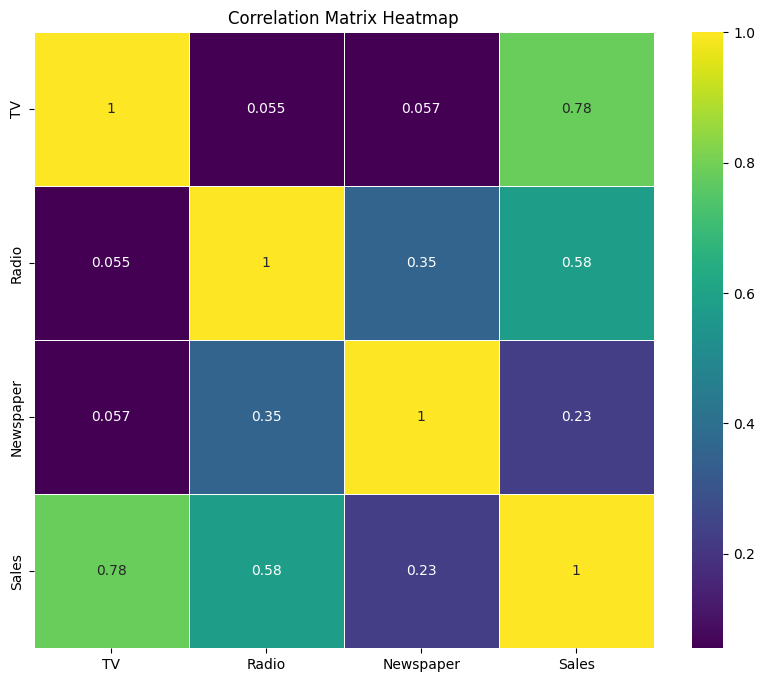

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

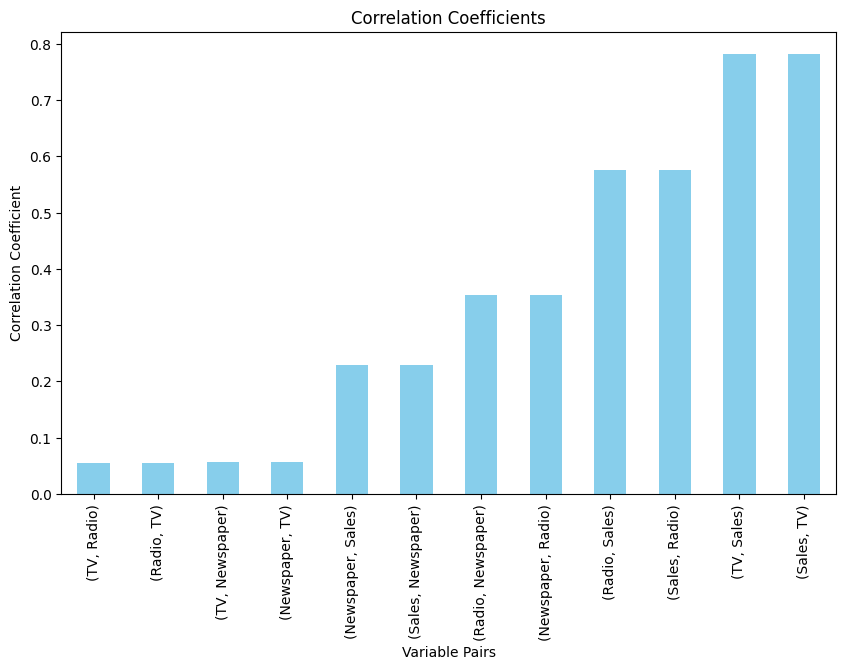

In [ ]:
correlation_series = correlation_matrix.unstack().sort_values()

# Exclude self-correlations (diagonal elements with correlation 1)
correlation_series = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]

# Create a bar chart
plt.figure(figsize=(10, 6))
correlation_series.plot(kind='bar', color='skyblue')
plt.title('Correlation Coefficients')
plt.xlabel('Variable Pairs')
plt.ylabel('Correlation Coefficient')
plt.show()

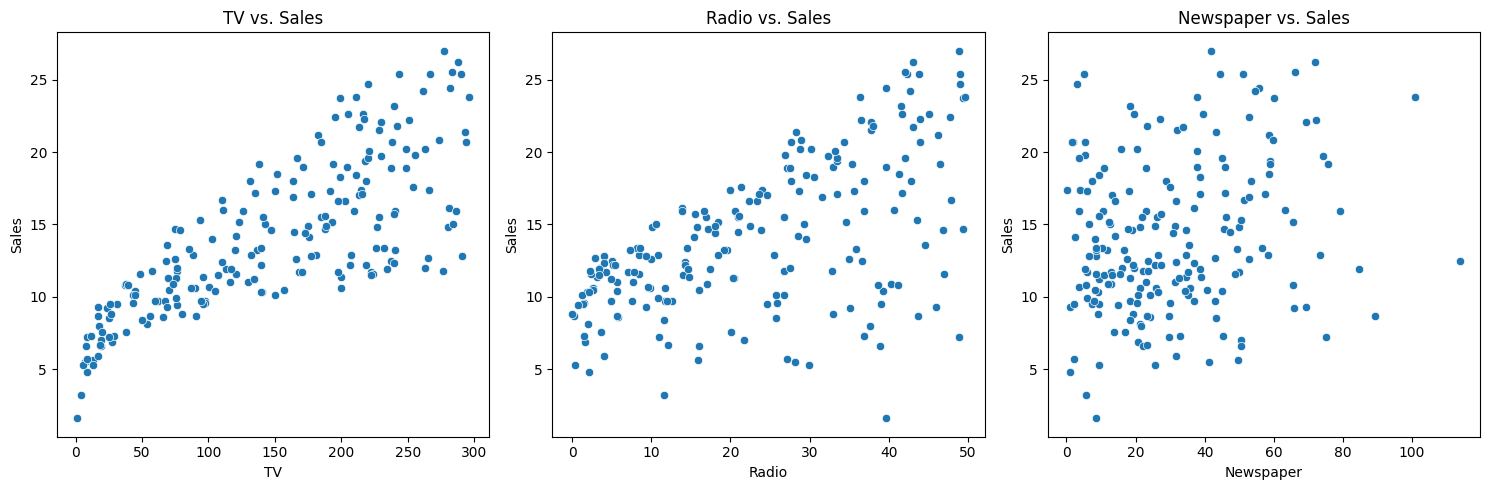

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs. Sales')

# Scatter plot for Radio vs. Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs. Sales')

# Scatter plot for Newspaper vs. Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs. Sales')

plt.tight_layout()
plt.show()

<ipython-input-56-6bdebb91e5a4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col_name], label=col_name, shade=True)
<ipython-input-56-6bdebb91e5a4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Sales"], label="Sales", shade=True)
<ipython-input-56-6bdebb91e5a4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col_name], label=col_name, shade=True)
<ipython-input-56-6bdebb91e5a4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Sales"], label="Sales", shade=True)
<ipython-input-5

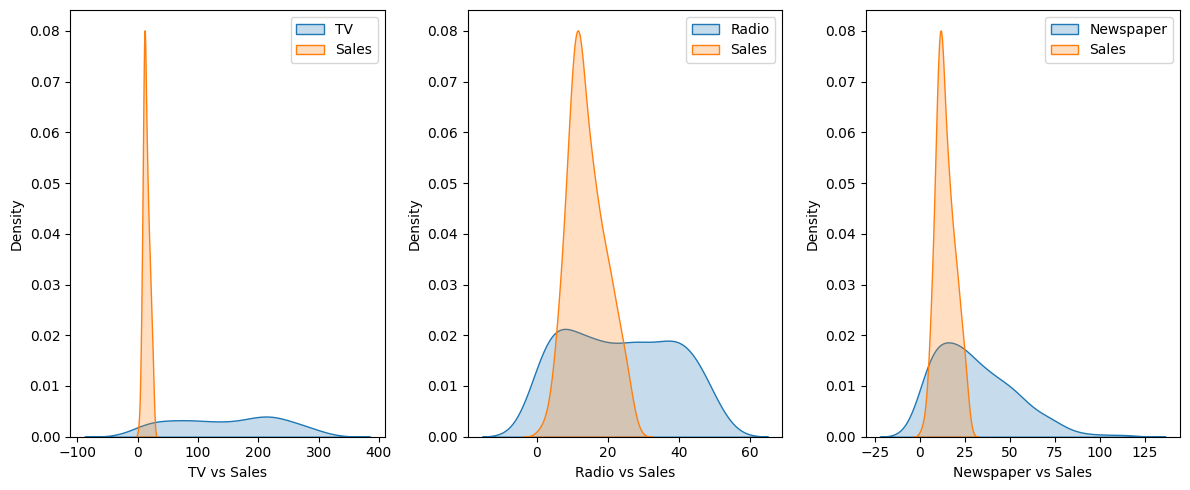

In [ ]:
plt.figure(figsize=(12, 5))
columns = ["TV", "Radio", "Newspaper"]

for i, col_name in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[col_name], label=col_name, shade=True)
    sns.kdeplot(df["Sales"], label="Sales", shade=True)
    plt.xlabel("{} vs Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

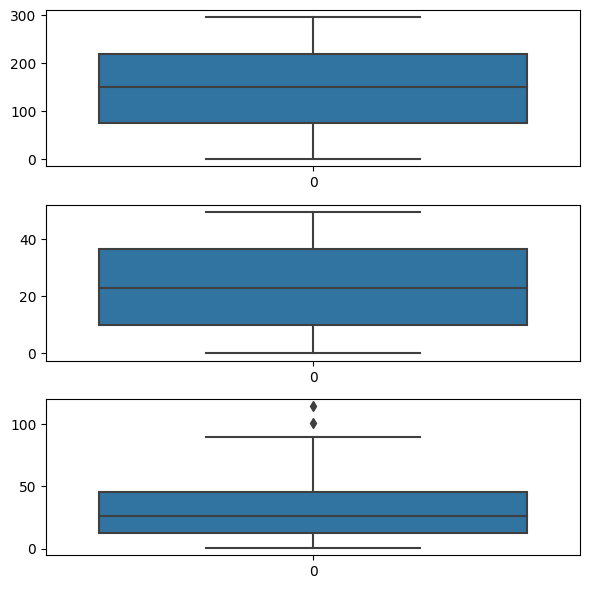

In [ ]:
fig, axis = plt.subplots (3, figsize = (6,6))
plt1 = sns.boxplot(df['TV'], ax = axis[0])

plt2 = sns.boxplot(df['Radio'], ax = axis[1])

plt3 = sns.boxplot(df['Newspaper'], ax = axis[2])

plt.tight_layout()

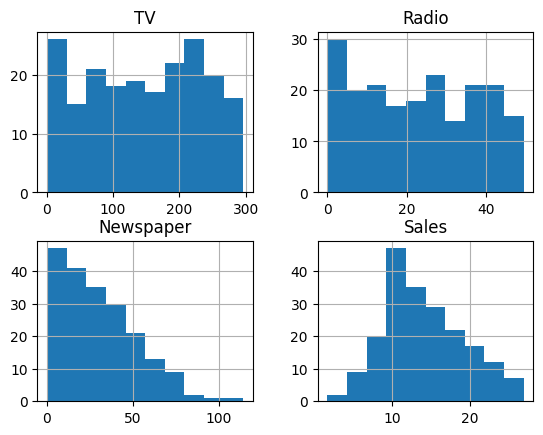

In [ ]:
df.hist()
plt.show()

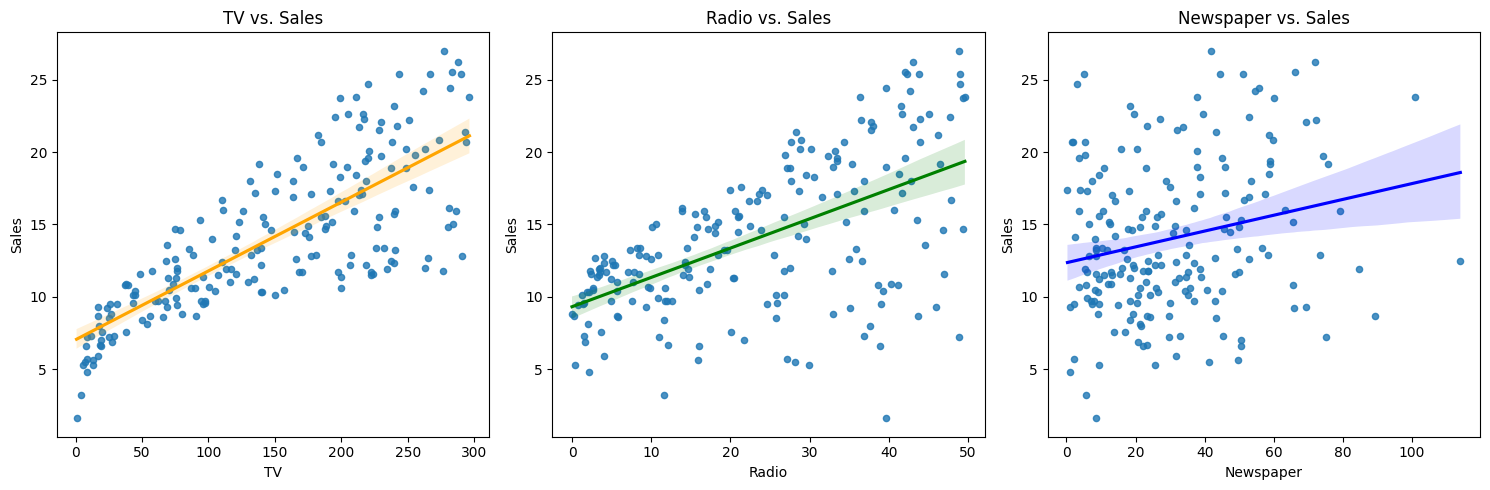

In [ ]:



# Set the figure size
plt.figure(figsize=(15, 5))

# Linear regression plot for TV vs. Sales
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=df, scatter_kws={'s': 20}, line_kws={'color': 'orange'})
plt.title('TV vs. Sales')

# Linear regression plot for Radio vs. Sales
plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=df, scatter_kws={'s': 20}, line_kws={'color': 'green'})
plt.title('Radio vs. Sales')

# Linear regression plot for Newspaper vs. Sales
plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=df, scatter_kws={'s': 20}, line_kws={'color': 'blue'})
plt.title('Newspaper vs. Sales')

plt.tight_layout()
plt.show()


In [ ]:
  df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


from matplotlib import pyplot as plt
df['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df[['TV', 'Radio', 'Newspaper']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Print the R-squared score as a measure of accuracy
print("Accuracy:", model.score(X_test, y_test)*100)

R-squared: 89.9438024100912


In [ ]:
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.1740973539761033


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.899438024100912


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # You can choose other scoring metrics as well

# Print the cross-validation scores
print("Cross-Validation Scores:", format(cv_scores.mean()))

Cross-Validation Scores: 0.8871063495438435


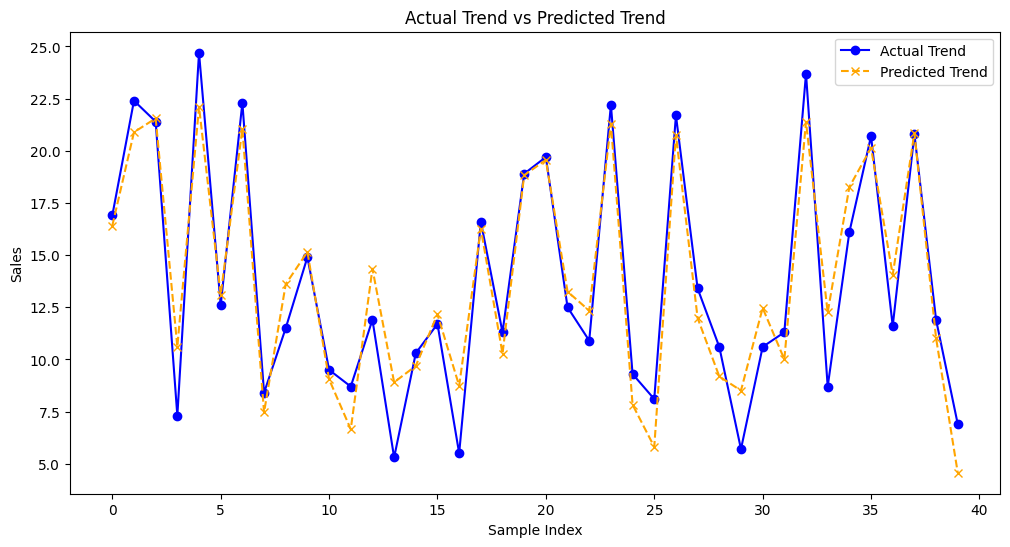

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the actual trend
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend', marker='o', linestyle='-', color='blue')

# Plot the predicted trend
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend', marker='x', linestyle='--', color='orange')

plt.title('Actual Trend vs Predicted Trend')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [20], 'Newspaper': [10]})
new_data_scaled = scaler.transform(new_data)

# Make predictions for the new data
predicted_sales = model.predict(new_data_scaled)

print("Predicted Sales:", predicted_sales)

Predicted Sales: [2.9624167]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
